## Polynomial Regression

First import some libraries to do some data manipulation, math, and modeling.

For polynomial regression, you want to pick the order/degree based on both low training error and low test error. This means it generalizes well represent the test and training sets.

In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import KFold
import numpy.polynomial.polynomial as poly
%matplotlib inline

## Import Data

Use pandas module to read the file and import into a dataframe. Print the data frame to make sure that the data is being imported correctly. Using "dataframe.values" returns a Numpy representation of the DataFrame to be spliced according to however is necessary. Reshape the feature matrix and target vector to both be of the same rank.

In [23]:
#df = pd.read_csv('/Users/Farhad_Ahmed/Desktop/ML intros/ML Project/HS_Regents_Sat_Scores_2015.csv')
df = pd.read_csv('HS_Regents_Sat_Scores_2015.csv')
#print(df)
#data = df.values

# extract all the columns that we need
df1=np.stack((df['Algebra2/Trigonometry'], df['English'], df['Geometry'],df['Global History and Geography'], df['Integrated Algebra'], df['Living Environment'], df['Physical Settings/Chemistry'], df['Physical Settings/Physics'], df['Average SAT Score (Total)'])).T

#remove any empty rows
df2=(df1[~np.isnan(df1).any(axis=1)])
print(df2)
print(df2.shape)

[[  52.6   71.9   66.4   61.    64.3   64.4   63.    64.7 1265. ]
 [  64.2   72.5   65.    66.9   63.5   70.8   65.7   71.5 1367. ]
 [  77.    74.    80.9   81.8   71.6   84.8   67.9   80.2 1700. ]
 [  81.2   88.2   84.2   90.9   88.2   90.7   83.1   79.9 1889. ]
 [  81.4   75.7   79.6   88.9   80.5   87.5   76.9   72.4 1704. ]
 [  64.    78.    72.1   72.6   72.6   73.2   73.1   74.1 1327. ]
 [  84.3   93.1   74.8   79.6   72.9   76.9   71.2   79.4 1511. ]
 [  92.9   91.5   93.1   94.3   93.7   93.6   88.7   91.5 2144. ]
 [  48.5   78.5   68.7   68.9   69.4   74.4   59.1   52.3 1358. ]
 [  51.3   74.6   64.3   60.2   68.3   64.3   54.2   50.4 1147. ]
 [  45.9   72.8   59.4   74.8   69.2   75.1   61.2   36.5 1292. ]
 [  67.8   83.2   75.5   81.    73.3   81.    66.2   63.2 1479. ]
 [  64.3   72.3   68.    65.    71.3   73.2   57.5   54.7 1116. ]
 [  81.9   78.2   82.5   85.1   84.7   83.    84.3   77.8 1529. ]
 [  56.    80.5   68.6   69.9   65.3   80.1   79.5   74.6 1257. ]
 [  54.9  

Now splice the dataframe into the feature matrix and target vector.

In [4]:
# df3 will be our feature matrix
df3 = df2[:,:8]
#print(df3)

# df4 will be the target vector
df4 = df2[:,8:]
#print(df4)

X = np.array(df3)
Y = np.array(df4)

# Check the shape of x and y vectors.
print(X.shape)
print(Y.shape)



(109, 8)
(109, 1)


## Plotting the Data: Training Set and Test Set K-FOLD 

To show the original shape of the training set. 

Here the feature matrix and target vector are both partitioned using k-fold. 

(87, 8) (22, 8) (87, 1) (22, 1)


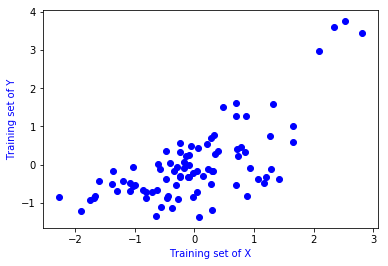

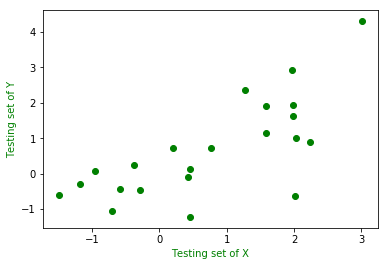

(87, 8) (22, 8) (87, 1) (22, 1)


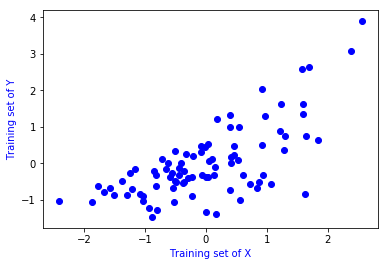

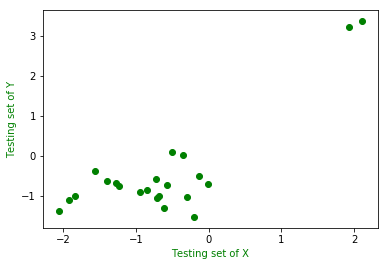

(87, 8) (22, 8) (87, 1) (22, 1)


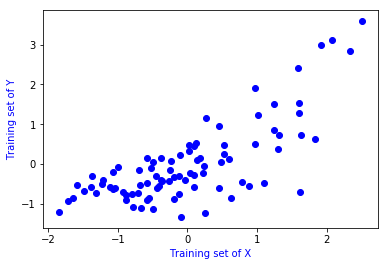

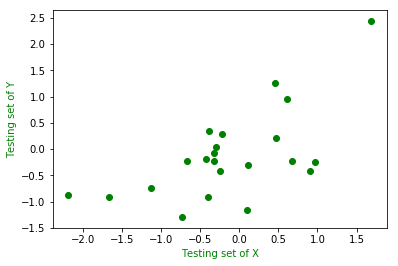

(87, 8) (22, 8) (87, 1) (22, 1)


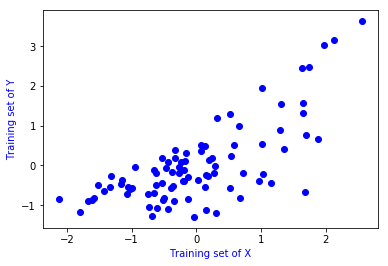

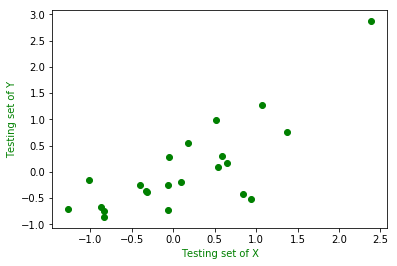

(88, 8) (21, 8) (88, 1) (21, 1)


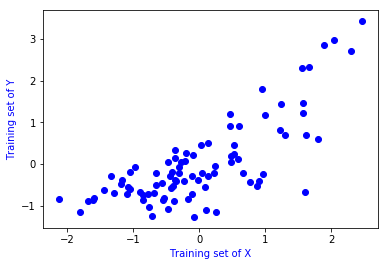

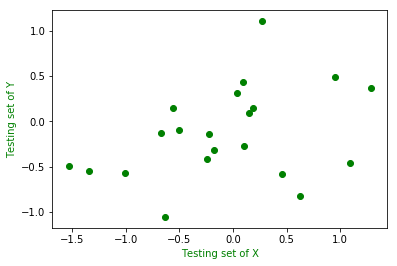

In [19]:
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    
    
    X_tr, X_test, Y_tr, Y_test = X[train], X[test], Y[train], Y[test]
    
    
    scaler = preprocessing.StandardScaler().fit(X_tr)
    X_tr = scaler.transform(X_tr) # zero mean and unit variance
    X_test = scaler.transform(X_test) # The n later when
    
    scaler = preprocessing.StandardScaler().fit(Y_tr)
    Y_tr = scaler.transform(Y_tr) # zero mean and unit variance
    Y_test = scaler.transform(Y_test) # The n later when
    
    print(X_tr.shape,X_test.shape,Y_tr.shape,Y_test.shape)
    
    plt.scatter(X_tr[:,0],Y_tr,color="blue")
    plt.xlabel('Training set of X',color="blue")
    plt.ylabel('Training set of Y',color="blue")
    plt.show()
    
    plt.scatter(X_test[:,0],Y_test,color="green")
    plt.xlabel('Testing set of X', color="green")
    plt.ylabel('Testing set of Y', color="green")
    plt.show()

## Model Selection

Obtain polynomial regression models of different orders starting from linear regression i.e. degree = 1 to higher degree models like degree = 2 to 10. Find training and test error for every order and plot these errors v/s degree. Select the order that fits the data best based on low training and test error. You can use poly.polyval method from numpy to find coefficients of the different models.

In [6]:
Errors_test = []
Errors_tr = []
for degree in range(1, 7):
    print("Degree: ", degree)
    # polyfit will return array of polynomial coefficients 
    polyCoefficients = poly.polyfit(X_tr, Y_tr, degree)
    print("Polynomial Coefficients: ", polyCoefficients)
    
    yHat_tr = poly.polyval(X_tr, polyCoefficients)
    TrainingError = np.sum(np.square(Y_tr - yHat_tr)) * 1/(2*Y_tr.shape[0])
    Errors_tr.append(TrainingError)
    print("Training Errors: ", Errors_tr)
    
    yHat_test  = poly.polyval(X_test, polyCoefficients)
    TestError = np.sum(np.square(Y_test - yHat_test)) * 1/(2*Y_test.shape[0])
    Errors_test.append(TestError)
    print("Test Errors: ", Errors_test)
    
    # creates evenly spaced numbers over a specified interval
    xAxisSpacing = np.linspace(-1, 1, 150)
    # evaluates the polynomial at all points across the xAxisSpacing
    yAxisHat = poly.polyval(xAxisSpacing, polyCoefficients)
    plt.xlim(-2,2)
    plt.ylim(-25,25)
    plt.plot(xAxisSpacing,yAxisHat, 'r-')
    plt.scatter(X_tr,Y_tr)
    plt.xlabel("Training Set of X")
    plt.ylabel("Training Set of Y")
    plt.xlim([-2,2])
    plt.show()
    
    
    

Degree:  1


TypeError: expected 1D vector for x

In [22]:
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    
    
    X_tr, X_test, Y_tr, Y_test = X[train], X[test], Y[train], Y[test]
    
    scaler = preprocessing.StandardScaler().fit(X_tr)
    X_tr = scaler.transform(X_tr) # zero mean and unit variance
    X_test = scaler.transform(X_test) # The n later when
    
    scaler = preprocessing.StandardScaler().fit(Y_tr)
    Y_tr = scaler.transform(Y_tr) # zero mean and unit variance
    Y_test = scaler.transform(Y_test) # The n later when
    
    # this is necessary for plotting, might need to undo  later
    #print(X_tr.shape,X_test.shape,Y_tr.shape,Y_test.shape)
    
    #X_tr = np.array(X_tr)
    #Y_tr = np.array(Y_tr)
    #X_test = np.array(X_test)
    #Y_test = np.array(Y_test)
    
    print(X_tr.shape)
    print(Y_tr.shape)
    Errors_test = []
    Errors_tr = []
    
    for degree in range(1, 7):
        #X is the independent variable (bivariate in this case)
        X = X_tr
        
        #vector is the dependent data
        vector = Y_tr

        #predict is an independent variable for which we'd like to predict the value
        predict= [0.49, 0.18]

        #generate a model of polynomial features
        poly = PolynomialFeatures(degree=2)

        #transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
        X_ = poly.fit_transform(X)

        #transform the prediction to fit the model type
        predict_ = poly.fit_transform(predict)

        #here we can remove polynomial orders we don't want
        #for instance I'm removing the `x` component
        X_ = np.delete(X_,(1),axis=1)
        predict_ = np.delete(predict_,(1),axis=1)

        #generate the regression object
        clf = linear_model.LinearRegression()
        #preform the actual regression
        clf.fit(X_, vector)

        print("X_ = ",X_)
        print("predict_ = ",predict_)
        print("Prediction = ",clf.predict(predict_))







    
    

(87, 8)
(87, 1)
Degree:  1


TypeError: expected 1D vector for x

Find training and test error for every order and plot these errors v/s degree. Select the order that fits the data best based on low training and test error.

In [ ]:

degree = np.array(range(1,11))
# Plot the degree against the Training Error
plt.plot(degree,Errors_tr)
plt.xlabel("Degree Order")
plt.ylabel("Training Error")
plt.title("Training Error vs. Degree Order")
plt.grid()

In [ ]:
degree = np.array(range(1,11))
# Plot the degree against the Training Error
plt.plot(degree,Errors_test)
plt.xlabel("Degree Order")
plt.ylabel("Test Error")
plt.title("test Error vs. Degree Order")
plt.grid()